# **Table of Contents**

1. [Introduction](#Section1)<br>
2. [Problem Statement](#Section2)<br>
3. [Installing & Importing Libraries](#Section3)<br>
4. [Data loading & Description](#Section4)<br>
5. [Data Pre-processing](#Section5)<br>
6. [Model Building](#Section6)<br>
7. [Model Training](#Section7)<br>
8. [Model Evaluation](#Section8)<br>
9. [Submission of test result data](#Section9)<br>
10. [Conclusion](#Section10)<br>

<a id = Section1></a>

# **1. Introduction**

In todays world of digital era, information of news is spreading from one corner of world to another at faster pace like never before and that too from various sources. The authenticity of the news becomes sometimes doubtful in such a huge inflow of information.<br>

Social media companies have hired thousand of employees to prevent spread of fake news however when sspread is happening at such a high scale, its almost not practical to verify and correct each and every news manually and there comes a use of AI. Researchers have started training AI application to automatically detect fake news.

<a id = Section2></a>

# 2. Problem Statement

It seems AI is better at creating fake news than identifying it. However lets assume that one of the social media companies want to build AI model to pro-actively detect the fake news and they have already had a dataset of such fake and real newspapers.Although maninly fake news is linked to specific sources, there are chances that fake news are the ones which are simulated or crowdsourced by humans. 
The objective here is that if we have a dataset of approx 45000 news classified into real and fake, can we build AI model that will help us to identify any possible fake news coming on the way.
The target feature of the data set has two lables as below:

Class Labels: <br>
**true** <br>
**fake** <br>

<left> 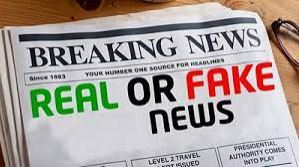

<a id = Section3></a>
# **3. Installing & Importing Libraries**

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
import keras
from keras.layers import Embedding
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import one_hot
from keras.layers import LSTM,Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SUDHIR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<a id = Section4></a>
# **4. Data Loading & Description**

In [2]:
df = pd.read_csv('G:/NLP2/Fake news dataset/data.csv')

In [3]:
df.head() 

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


It can be seen that input variables consists of title, text, subject and date of news and target vairiable is 'target'.
We can exxclude subject and date starightaway from input features list as they would not logically affect the class of news. 
Title and text are the choices of input variables however 'text' variable would give more content of the news and hence we would keep 'text' as the only input feature to build model.

In [4]:
df['subject'].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east', 'politicsNews', 'worldnews'], dtype=object)

C:\Users\SUDHIR\Anaconda3\envs\conda_env\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='subject', ylabel='count'>

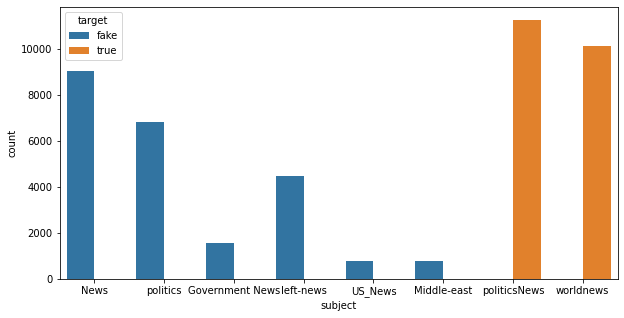

In [5]:
plt.figure(figsize=(10,5))
sns.countplot(df['subject'], hue = 'target', data = df)

In [6]:
df['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [7]:
df.describe()

,title,text,subject,date,target
count,44898,44898,44898,44898,44898
unique,38729,38646,8,2397,2
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",fake
freq,14,627,11272,182,23481


In [8]:
df.isnull().any()

title      False
text       False
subject    False
date       False
target     False
dtype: bool

No NaN data found

In [9]:
df = df.dropna()

In [10]:
# Lets keep only 'text' column in X as a training and testing data
X = df.drop(['target', 'subject', 'title', 'date' ], axis = 1)

In [11]:
y = df['target'].to_frame()

In [12]:
df.iloc[40000:40005, -1]

40000    true
40001    true
40002    true
40003    true
40004    true
Name: target, dtype: object

In [13]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(df['target'])

#### After label encoding, 'fake' and 'true' lables are converted to '0' and '1' values respectively

<AxesSubplot:xlabel='target', ylabel='count'>

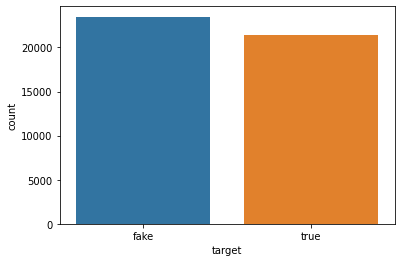

In [14]:
sns.countplot(x = 'target', data = df)

Both the classes have sufficient data for prediction 

<a id = Section5></a>
# **5. Data Preprocessing**

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

##### Remove all numbers, special characters and only keep alphabets, then convert the words into lower case

In [16]:
import re
def clean(text):
    # removing all characteres other than alphabets
    cleaned_text = re.sub("[^a-zA-Z]", " ", text)
    cleaned_text = cleaned_text.lower()
    return cleaned_text

X['cleaned (only A to Z)'] = X['text'].apply(lambda x: clean(x))

In [17]:
X.head()

,text,cleaned (only A to Z)
0,Donald Trump just couldn t wish all Americans ...,donald trump just couldn t wish all americans ...
1,House Intelligence Committee Chairman Devin Nu...,house intelligence committee chairman devin nu...
2,"On Friday, it was revealed that former Milwauk...",on friday it was revealed that former milwauk...
3,"On Christmas day, Donald Trump announced that ...",on christmas day donald trump announced that ...
4,Pope Francis used his annual Christmas Day mes...,pope francis used his annual christmas day mes...


**Split the sentences into words so that stopwords can be applied** 

In [18]:
def sent_to_words(text):
    words = text.split()
    return words 

X['sent_to_words'] = X['cleaned (only A to Z)'].apply(lambda x : sent_to_words(x))


In [19]:
X.head()

,text,cleaned (only A to Z),sent_to_words
0,Donald Trump just couldn t wish all Americans ...,donald trump just couldn t wish all americans ...,"[donald, trump, just, couldn, t, wish, all, am..."
1,House Intelligence Committee Chairman Devin Nu...,house intelligence committee chairman devin nu...,"[house, intelligence, committee, chairman, dev..."
2,"On Friday, it was revealed that former Milwauk...",on friday it was revealed that former milwauk...,"[on, friday, it, was, revealed, that, former, ..."
3,"On Christmas day, Donald Trump announced that ...",on christmas day donald trump announced that ...,"[on, christmas, day, donald, trump, announced,..."
4,Pope Francis used his annual Christmas Day mes...,pope francis used his annual christmas day mes...,"[pope, francis, used, his, annual, christmas, ..."


**Words like a, an, the are the redundent and doesnt play any role, so remove these type of words by using stopwords**

In [20]:
stopword = stopwords.words("english")

In [21]:
def clean_words(word_list):
    
    wordss = [word for word in word_list if word not in stopword]
    wordss = " ".join(wordss)
    return wordss
X['cleaned_words'] = X['sent_to_words'].apply(lambda x : clean_words(x))


In [22]:
X.head()

,text,cleaned (only A to Z),sent_to_words,cleaned_words
0,Donald Trump just couldn t wish all Americans ...,donald trump just couldn t wish all americans ...,"[donald, trump, just, couldn, t, wish, all, am...",donald trump wish americans happy new year lea...
1,House Intelligence Committee Chairman Devin Nu...,house intelligence committee chairman devin nu...,"[house, intelligence, committee, chairman, dev...",house intelligence committee chairman devin nu...
2,"On Friday, it was revealed that former Milwauk...",on friday it was revealed that former milwauk...,"[on, friday, it, was, revealed, that, former, ...",friday revealed former milwaukee sheriff david...
3,"On Christmas day, Donald Trump announced that ...",on christmas day donald trump announced that ...,"[on, christmas, day, donald, trump, announced,...",christmas day donald trump announced would bac...
4,Pope Francis used his annual Christmas Day mes...,pope francis used his annual christmas day mes...,"[pope, francis, used, his, annual, christmas, ...",pope francis used annual christmas day message...


In [23]:
def word_count(string):
    string = str(string).split(' ')
    return len(string)

X['word_count'] = X['cleaned_words'].apply(lambda x : word_count(x))
    
    

In [24]:
X.head()

,text,cleaned (only A to Z),sent_to_words,cleaned_words,word_count
0,Donald Trump just couldn t wish all Americans ...,donald trump just couldn t wish all americans ...,"[donald, trump, just, couldn, t, wish, all, am...",donald trump wish americans happy new year lea...,266
1,House Intelligence Committee Chairman Devin Nu...,house intelligence committee chairman devin nu...,"[house, intelligence, committee, chairman, dev...",house intelligence committee chairman devin nu...,184
2,"On Friday, it was revealed that former Milwauk...",on friday it was revealed that former milwauk...,"[on, friday, it, was, revealed, that, former, ...",friday revealed former milwaukee sheriff david...,347
3,"On Christmas day, Donald Trump announced that ...",on christmas day donald trump announced that ...,"[on, christmas, day, donald, trump, announced,...",christmas day donald trump announced would bac...,278
4,Pope Francis used his annual Christmas Day mes...,pope francis used his annual christmas day mes...,"[pope, francis, used, his, annual, christmas, ...",pope francis used annual christmas day message...,212


In [25]:
X.nlargest(20, 'word_count', keep = 'last')

,text,cleaned (only A to Z),sent_to_words,cleaned_words,word_count
23086,Funny how secrets travel. I d start to believ...,funny how secrets travel i d start to believ...,"[funny, how, secrets, travel, i, d, start, to,...",funny secrets travel start believe bleed lyric...,4975
22303,Funny how secrets travel. I d start to believ...,funny how secrets travel i d start to believ...,"[funny, how, secrets, travel, i, d, start, to,...",funny secrets travel start believe bleed lyric...,4975
17849,We just discovered another reason NOT to suppo...,we just discovered another reason not to suppo...,"[we, just, discovered, another, reason, not, t...",discovered another reason support nfl man anti...,4805
9731,We just discovered another reason NOT to suppo...,we just discovered another reason not to suppo...,"[we, just, discovered, another, reason, not, t...",discovered another reason support nfl man anti...,4805
22761,Shawn Helton 21st Century WireAlthough many ar...,shawn helton st century wirealthough many ar...,"[shawn, helton, st, century, wirealthough, man...",shawn helton st century wirealthough many stil...,4713
21978,Shawn Helton 21st Century WireAlthough many ar...,shawn helton st century wirealthough many ar...,"[shawn, helton, st, century, wirealthough, man...",shawn helton st century wirealthough many stil...,4713
19621,There have been many articles written about Ge...,there have been many articles written about ge...,"[there, have, been, many, articles, written, a...",many articles written george soros collectivis...,4548
12406,There have been many articles written about Ge...,there have been many articles written about ge...,"[there, have, been, many, articles, written, a...",many articles written george soros collectivis...,4548
23289,Shawn Helton 21st Century WireThe 1994 cult fi...,shawn helton st century wirethe cult fi...,"[shawn, helton, st, century, wirethe, cult, fi...",shawn helton st century wirethe cult film natu...,4394
22506,Shawn Helton 21st Century WireThe 1994 cult fi...,shawn helton st century wirethe cult fi...,"[shawn, helton, st, century, wirethe, cult, fi...",shawn helton st century wirethe cult film natu...,4394


In [26]:
from keras.preprocessing.text import one_hot
vocab_size= 10000

In [27]:
# one-hot encoding train_data
Words_to_list= []
for i in range(0, len(X)):
    Words_to_list.append(X["cleaned_words"][i])
    
encoded_X= [one_hot(word, vocab_size) for word in Words_to_list]

In [28]:
from keras.preprocessing.sequence import pad_sequences
text_length= 500

# applying padding to one-hot encoded train_data
padded_X= pad_sequences(encoded_X, padding= "pre", maxlen=text_length)


In [29]:
padded_X.shape

(44898, 500)

**Create final feature and target for training data, also create separate data for test set**

In [30]:
# for training 
sequences = np.array(padded_X)[:40000,]
target = np.array(y)[:40000]

# for testing
test_sequences = np.array(padded_X)[40000:,]


In [31]:
print('shape of sequences:', sequences.shape)
sequences

shape of sequences: (40000, 500)


array([[   0,    0,    0, ..., 8890,  419, 8659],
       [   0,    0,    0, ..., 3822,  419, 8659],
       [   0,    0,    0, ...,  494,  419, 8659],
       ...,
       [   0,    0,    0, ..., 2247, 4601, 4342],
       [   0,    0,    0, ..., 6496, 6110, 7544],
       [   0,    0,    0, ...,  524, 3850, 2486]])

In [32]:
print('shape of target:', target.shape)
target

shape of target: (40000,)


array([0, 0, 0, ..., 1, 1, 1])

**Split data into train and validation test**

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(sequences, target, test_size = 0.25, random_state = 2)

In [34]:
x_train.shape, x_val.shape

((30000, 500), (10000, 500))

In [35]:
y_train.shape, y_val.shape

((30000,), (10000,))

In [36]:
x_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

<a id = Section6></a>
# **6. Model building**

In [37]:
# Embedding feature will be kept as 50
# Add embedding layer with dimension as 10000, 50, 500(timesteps)
# Since it is binary classfication problem, we will use sigmoid as activation function on final Dense layer

embedding_size = 50
model = Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=text_length))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(1, activation= 'sigmoid'))


In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 50)           500000    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               91648     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 591,777
Trainable params: 591,777
Non-trainable params: 0
_________________________________________________________________


<a id = Section7></a>
# **7. Model Training**

**Compile the model, using loss as binary_crossentropy for two class classification, metrics as accuracy**

In [41]:

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Fit the model**
**using batch size as 200 and epochs as 5**

In [42]:

history = model.fit(x_train, y_train, validation_data= (x_val, y_val), batch_size = 200, epochs = 5)

Epoch 1/5
150/150 [==============================] - 470s 3s/step - loss: 0.2535 - accuracy: 0.8822 - val_loss: 0.0844 - val_accuracy: 0.9714
Epoch 2/5
150/150 [==============================] - 492s 3s/step - loss: 0.1252 - accuracy: 0.9637 - val_loss: 0.1206 - val_accuracy: 0.9568
Epoch 3/5
150/150 [==============================] - 507s 3s/step - loss: 0.0537 - accuracy: 0.9832 - val_loss: 0.0639 - val_accuracy: 0.9809
Epoch 4/5
150/150 [==============================] - 486s 3s/step - loss: 0.0349 - accuracy: 0.9896 - val_loss: 0.0648 - val_accuracy: 0.9815
Epoch 5/5
150/150 [==============================] - 507s 3s/step - loss: 0.0263 - accuracy: 0.9926 - val_loss: 0.0735 - val_accuracy: 0.9803


**Training accuracy is 99.16 however validation accuracy is coming up as 98.03. This means model is slightly overfitting and it could be avoided by adding more complex model by adding more LSTM / RRN layers or simply by increaing the units in existing layer however this would cause computational issue as we are running this notebook in personal laptop**

<a id = Section8></a>
# **8. Model Evaluation**

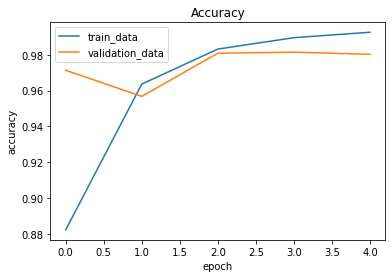

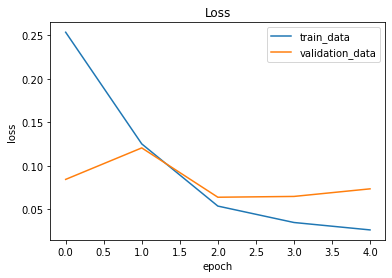

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

epochs= range(len(history.history["accuracy"]))
# accuracy plot
plt.plot(epochs, history.history["accuracy"])
plt.plot(epochs, history.history["val_accuracy"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Accuracy")
plt.legend(["train_data", "validation_data"])
plt.show()

# loss plot
plt.plot(epochs, history.history["loss"])
plt.plot(epochs, history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Loss")
plt.legend(["train_data", "validation_data"])
plt.show()

**Model performance on validation data**

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


(<Figure size 432x432 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

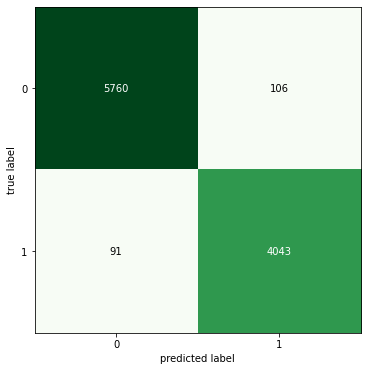

In [44]:
pred_val = np.array(model.predict_classes(x_val))

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_val, pred_val)
plot_confusion_matrix(cm, figsize=(6, 6), cmap = 'Greens')


<a id = Section9></a>
# **9. Submission of test result data**

In [45]:
test = np.array(test_sequences)
test_pred = model.predict_classes(test)

In [46]:
submission = pd.DataFrame()
submission['text'] = X['text'][40000:]


In [47]:
submission["prediction"] = test_pred
submission.to_csv('submission.csv', index = False)

In [48]:
submission.head()

,text,prediction
40000,LONDON (Reuters) - British Prime Minister Ther...,1
40001,PARIS (Reuters) - Battered and bruised from el...,1
40002,LONDON (Reuters) - Britain s Brexit ministry s...,1
40003,MADRID (Reuters) - Catalan separatist leader C...,1
40004,NAIROBI (Reuters) - A presidential election sc...,1


<a id = Section10></a>
# **10. Conclusion**

- We investigated the dataset and split the dataset into training, validation and test datasets for building model. Out of approx **45000** data points, we used **30000** data points for training, **10000** for validation and rest approx **5000** left for test data sets. 
- There were four input features however we keep only **'text' feature** for building model. Target variable was shaving two classes, **fake and true** and we converted it into **0 and 1** respectively using **LabelEncoder**. 
- Dataset almost has **equal data points** for both target classes so it is **balanced one**. 
- Text data column contents further undergone pre-processing such as **removing numbers and characters apart from A to Z**, changing to lower case, **removing stopwords and then one-hot encoding each word**. This made input feature and target variable converted into numbers. 
- **Padding** is then applied on text column for max sequence length of **500** before training the **LSTM** model. **Dropout of 0.3** is used to avoid too much **overfitting**.  
- Relatively **simple LSTM** is used for training the model considering huge computational time and to avoid RAM issue on laptop.
- **Accuracy of 98 %** is achieved on validation data set and finally the results for predictions on test data set is sent into CSV file for submission. 